<a href="https://colab.research.google.com/github/Andorfim/NanostructurePhysics/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Шаг 1: Уравнение для производной y'(x):


   4    d          d             1        
5⋅y (x)⋅──(y(x)) + ──(y(x)) + ────────    
        dx         dx             2       
                              cosh (x)    
────────────────────────────────────── = 0
                4                         
             5⋅y (x) + 1                  


Шаг 2: Значение y при x = 0.5:
-0.445


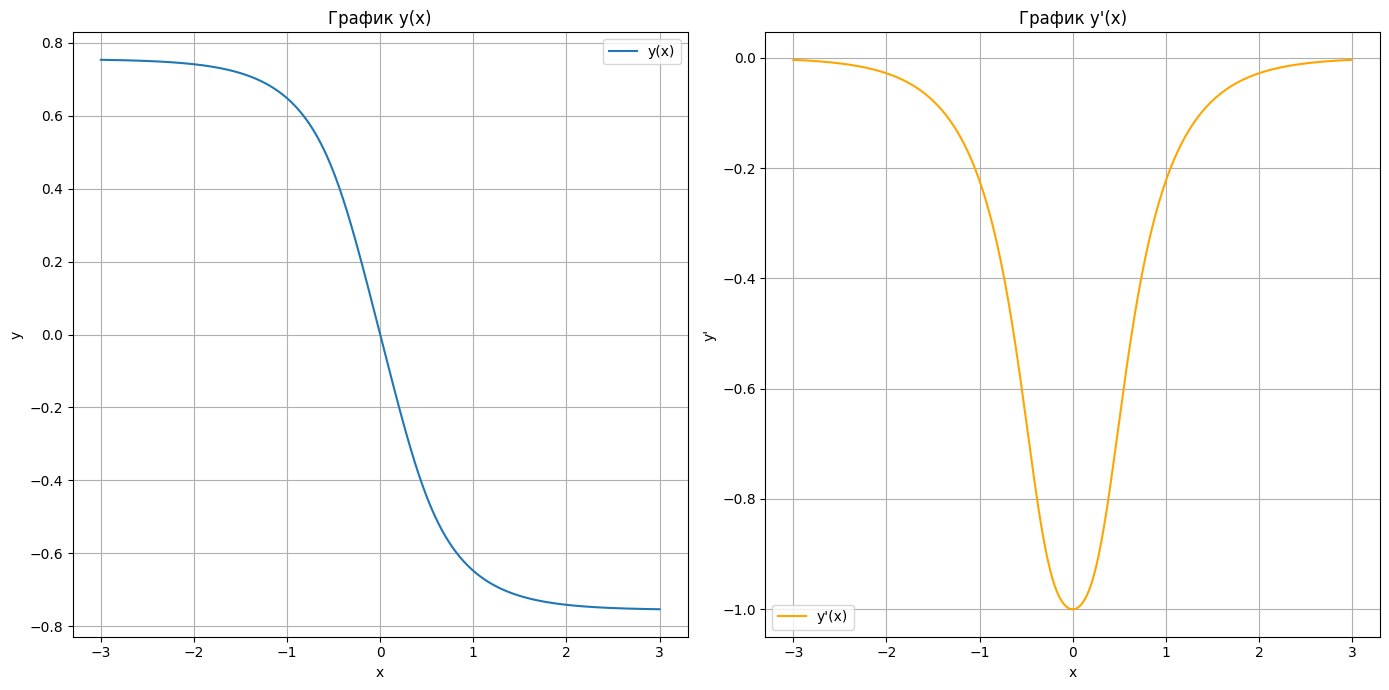

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from sympy import symbols, Function, Eq, diff, tanh, sech, simplify
from sympy import init_printing
from IPython.display import display

# Инициализируем печать
init_printing(use_latex='mathjax')

# Объявляем переменные
x_sym = symbols('x')
y_sym = Function('y')(x_sym)

# Определяем исходное уравнение
equation_sym = Eq(y_sym**5 + y_sym + tanh(x_sym), 0)

# Находим dy/dx, используя правило цепочки и упрощая выражение
dy_dx_sym = diff(equation_sym.lhs, x_sym) / diff(equation_sym.lhs, y_sym)
dy_dx_sym = simplify(dy_dx_sym)

# Формируем уравнение dy/dx
equation_dy_dx = Eq(dy_dx_sym, 0)

# Выводим уравнение dy/dx
print("Шаг 1: Уравнение для производной y'(x):")
display(equation_dy_dx)

# Часть 2: Численное решение для y при заданном x
def find_y_numeric(x_val):
    func = lambda y: y**5 + y + np.tanh(x_val)
    y_initial_guess = 0.0
    y_solution = fsolve(func, y_initial_guess)
    return y_solution[0]

x_val_example = 0.5  # Пример значения x
y_val_example = find_y_numeric(x_val_example)

print("\nШаг 2: Значение y при x = {}:".format(x_val_example))
print(round(y_val_example, 3))

# Часть 3: Построение графиков y(x) и y'(x)
x_vals = np.linspace(-3, 3, 400)
y_vals = np.array([find_y_numeric(x) for x in x_vals])

# Производная y'(x) выражается через y(x), поэтому для каждого x вычисляем y и затем y'
y_prime_vals = -1 / (np.cosh(x_vals)**2 * (1 + 5 * y_vals**4))

plt.figure(figsize=(14, 7))

# График y(x)
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, label="y(x)")
plt.title("График y(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()

# График y'(x)
plt.subplot(1, 2, 2)
plt.plot(x_vals, y_prime_vals, label="y'(x)", color='orange')
plt.title("График y'(x)")
plt.xlabel("x")
plt.ylabel("y'")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Для x = 0.5:
y = -0.445
y' = -0.658


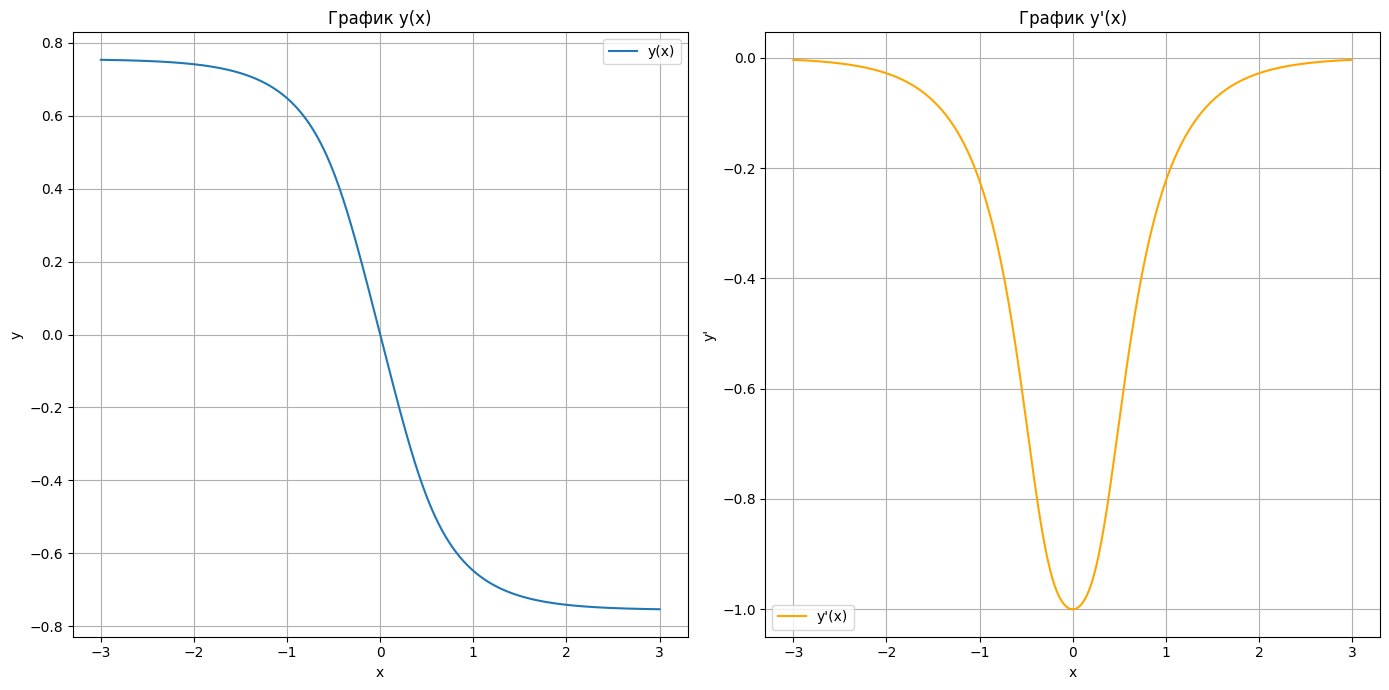

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Шаг 2: Функция для нахождения значения y при заданном x
def equation_for_y(y, x_val):
    return y**5 + y + np.tanh(x_val)

# Функция для численного нахождения корня уравнения y^5 + y + tanh(x) = 0
def find_y_root_scalar(x_val):
    sol = root_scalar(equation_for_y, args=(x_val,), bracket=[-3, 3], method='brentq')
    return sol.root

# Пример значения x для вывода y
x_example = 0.5
y_example = find_y_root_scalar(x_example)
dy_dx_example = -1 / (np.cosh(x_example)**2 * (1 + 5 * y_example**4))

# Выводим значение y и y' при заданном x
print(f"Для x = {x_example}:")
print(f"y = {round(y_example, 3)}")
print(f"y' = {round(dy_dx_example, 3)}")

# Шаг 3: Графики y(x) и y'(x)
x_vals = np.linspace(-3, 3, 400)
y_vals = np.array([find_y_root_scalar(x) for x in x_vals])
dy_vals = -1 / (np.cosh(x_vals)**2 * (1 + 5 * y_vals**4))

plt.figure(figsize=(14, 7))

# График y(x)
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, label='y(x)')
plt.title('График y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

# График y'(x)
plt.subplot(1, 2, 2)
plt.plot(x_vals, dy_vals, label="y'(x)", color='orange')
plt.title("График y'(x)")
plt.xlabel('x')
plt.ylabel("y'")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
